<a href="https://colab.research.google.com/github/HiroshiATakano/GitHub/blob/master/dl4us_lesson2_sec2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
%matplotlib inline

import os

import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Input,Activation,add,Add,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

random_state = 42

In [3]:
from tensorflow.keras.models import load_model

(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(-1,784)/255
x_test = x_test.reshape(-1,784)/255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model_ = load_model('/content/drive/My Drive/mnist_cnn.ht')
score = model_.evaluate(x_test,y_test,verbose=0)
print('Test loss: ',score[0])
print('Test accuracy: ',score[1])

W0622 12:39:52.990175 139842327955328 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0622 12:39:52.992523 139842327955328 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0622 12:39:53.251891 139842327955328 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype 

Test loss:  0.33221564482450483
Test accuracy:  0.8882


In [0]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

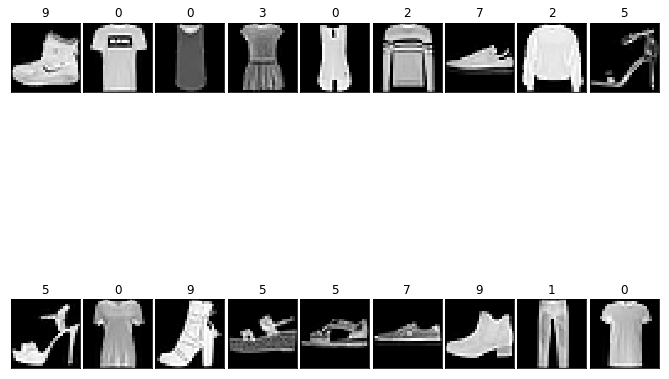

In [5]:
fig = plt.figure(figsize=(9,15))
fig.subplots_adjust(left=0,right=1,bottom=0,top=0.5,hspace=0.05,wspace=0.05)

for i in range(18):
    ax = fig.add_subplot(2,9,i+1,xticks=[],yticks=[])
    ax.set_title(str(y_train[i]))
    ax.imshow(x_train[i],cmap='gray')

In [6]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [7]:
x_train = x_train.reshape((x_train.shape[0],28,28,1))/255
x_test = x_test.reshape((x_test.shape[0],28,28,1))/255
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [0]:
model=Sequential()

model.add(Conv2D(16,kernel_size=(5,5),activation='relu',
                 kernel_initializer='he_normal',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(5,5),activation='relu',
                 kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

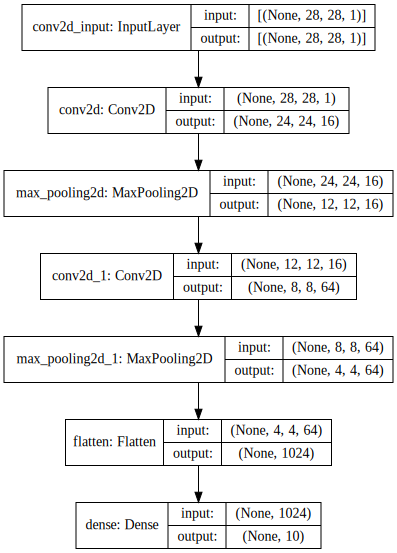

In [10]:
SVG(model_to_dot(model,show_shapes=True).create(prog='dot',format='svg'))

In [11]:
early_stopping = EarlyStopping(patience=10,verbose=1)

model.fit(x_train,y_train,batch_size=128,verbose=1,epochs=100,validation_data=(x_test,y_test),
         callbacks=[early_stopping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 71us/sample - loss: 0.5361 - acc: 0.8092 - val_loss: 0.4118 - val_acc: 0.8507
Epoch 2/100
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3581 - acc: 0.8709 - val_loss: 0.3580 - val_acc: 0.8737
Epoch 3/100
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3111 - acc: 0.8876 - val_loss: 0.3419 - val_acc: 0.8806
Epoch 4/100
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2813 - acc: 0.8997 - val_loss: 0.3065 - val_acc: 0.8918
Epoch 5/100
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2613 - acc: 0.9052 - val_loss: 0.2966 - val_acc: 0.8955
Epoch 6/100
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2426 - acc: 0.9117 - val_loss: 0.2944 - val_acc: 0.8973
Epoch 7/100
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2277 - acc: 0.9166 - val_l

In [12]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Test loss: ',score[0])
print('Test accuracy: ',score[1])


Test loss:  0.30500814530849457
Test accuracy:  0.9046


In [13]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print(y_train.shape)

x_train = x_train.astype('float32')/255
y_train = np.eye(10)[y_train.astype('int32').flatten()]

x_test = x_test.astype('float32')/255
y_test = np.eye(10)[y_test.astype('int32').flatten()]

x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train,test_size=10000)

170500096/170498071 [==============================] - 6s 0us/step
(50000, 1)


In [14]:
y_train.shape

(40000, 10)

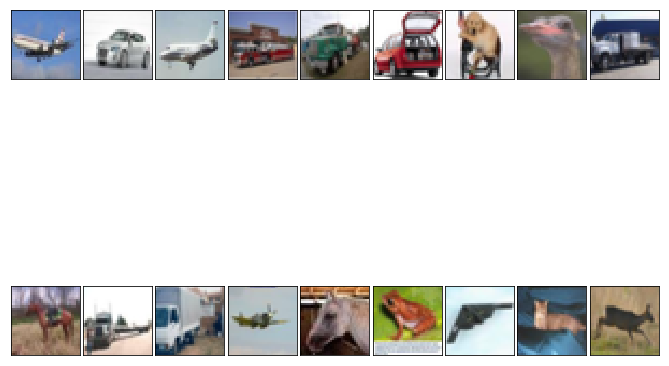

In [15]:
fig = plt.figure(figsize=(9,15))
fig.subplots_adjust(left=0,right=1,bottom=0,top=0.5,hspace=0.05,wspace=0.05)

for i in range(18):
    ax = fig.add_subplot(2,9,i+1,xticks=[],yticks=[])
    ax.imshow(x_train[i])

In [0]:
model=Sequential()

model.add(Conv2D(6,kernel_size=(5,5),activation='relu',
                 kernel_initializer='he_normal',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16,kernel_size=(5,5),activation='relu',
                 kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(120,activation='relu',
               kernel_initializer='he_normal'))
model.add(Dense(84,activation='relu',
                kernel_initializer='he_normal'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

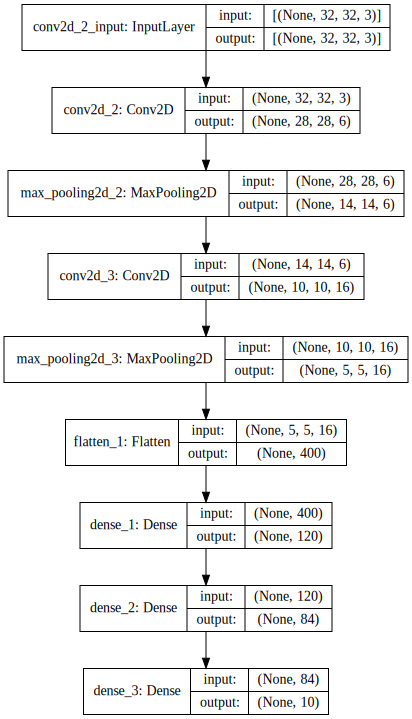

In [17]:
SVG(model_to_dot(model,show_shapes=True).create(prog='dot',format='svg'))

In [18]:
early_stopping = EarlyStopping(patience=1,verbose=1)

model.fit(x_train,y_train,batch_size=128,verbose=1,epochs=100,validation_data=(x_test,y_test),
         callbacks=[early_stopping])

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 3s 63us/sample - loss: 1.8023 - acc: 0.3501 - val_loss: 1.5823 - val_acc: 0.4257
Epoch 2/100
40000/40000 [==============================] - 2s 56us/sample - loss: 1.5114 - acc: 0.4558 - val_loss: 1.4653 - val_acc: 0.4727
Epoch 3/100
40000/40000 [==============================] - 2s 55us/sample - loss: 1.4011 - acc: 0.4981 - val_loss: 1.3941 - val_acc: 0.4966
Epoch 4/100
40000/40000 [==============================] - 2s 53us/sample - loss: 1.3279 - acc: 0.5252 - val_loss: 1.3546 - val_acc: 0.5112
Epoch 5/100
40000/40000 [==============================] - 2s 51us/sample - loss: 1.2567 - acc: 0.5491 - val_loss: 1.2966 - val_acc: 0.5374
Epoch 6/100
40000/40000 [==============================] - 2s 51us/sample - loss: 1.2105 - acc: 0.5693 - val_loss: 1.2620 - val_acc: 0.5551
Epoch 7/100
40000/40000 [==============================] - 2s 51us/sample - loss: 1.1714 - acc: 0.5847 - val_l

In [19]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Test loss: ',score[0])
print('Test accuracy: ',score[1])

Test loss:  1.2923561561584473
Test accuracy:  0.5442
